# Implementación con la librería scipy.cluster (kmeans2)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time

from scipy.cluster.vq import kmeans2,vq
from sklearn import metrics
import sys

In [2]:
df= pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df['Month'].replace({'Jan' : 1, 'Feb' : 2, 'Mar':3,'Apr':4,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}, inplace = True)

In [4]:
df['VisitorType'].replace({'Returning_Visitor' : 1, 'New_Visitor' : 0,'Other':2}, inplace = True)

In [5]:
df['Weekend'].replace({ True : 1, False : 0}, inplace = True)

In [6]:
df['Revenue'].replace({True : 1, False : 0}, inplace = True)

In [7]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,1,0


In [8]:
data=df.values

In [9]:
t1=time.time()

In [10]:
#K = 2 (2 clusters)
centroids,_ = kmeans2(data,2)

In [11]:
t2=time.time()
tiempo = float(t2-t1)

print('K-means utilizando scipy.kmeans() para k=2')
print("Tiempo de ejecucion: {} segundos".format(tiempo))

K-means utilizando scipy.kmeans() para k=2
Tiempo de ejecucion: 0.025502920150756836 segundos


In [12]:
idx,_ = vq(data,centroids)
idx,_

(array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([785.93868876, 722.24680224, 785.95341814, ..., 602.75375625,
        436.99360199, 764.72539225]))

In [13]:
centroids

array([[2.03128856e+00, 6.98811882e+01, 3.98378283e-01, 2.50179935e+01,
        2.29660673e+01, 7.82062665e+02, 2.35398101e-02, 4.49922864e-02,
        5.77560890e+00, 6.25418650e-02, 7.52855632e+00, 2.12180504e+00,
        2.35651331e+00, 3.16754803e+00, 4.10884893e+00, 8.59686233e-01,
        2.32592984e-01, 1.42164640e-01],
       [5.58841463e+00, 2.06932425e+02, 1.71646341e+00, 1.43486293e+02,
        1.32800813e+02, 5.95318892e+03, 6.64332858e-03, 2.09401572e-02,
        7.19968587e+00, 4.85772358e-02, 9.07520325e+00, 2.14939024e+00,
        2.36382114e+00, 2.91463415e+00, 3.61686992e+00, 9.82723577e-01,
        2.32723577e-01, 2.99796748e-01]])

In [14]:
# Medimos el tamaño en bytes del objeto
print(sys.getsizeof(centroids,_), 'bytes')

400 bytes


In [15]:
metrics.silhouette_score(data, idx, metric='euclidean')

0.7788285376031006

In [16]:
t1=time.time()

In [17]:
#K = 3 (3 clusters)
centroids,_ = kmeans2(data,3)

In [18]:
t2=time.time()
tiempo = float(t2-t1)

print('K-means utilizando scipy.kmeans() para k=3')
print("Tiempo de ejecucion: {} segundos".format(tiempo))

K-means utilizando scipy.kmeans() para k=3
Tiempo de ejecucion: 0.026184797286987305 segundos


In [19]:
idx,_ = vq(data,centroids)
idx,_

(array([2, 2, 2, ..., 2, 2, 2], dtype=int32),
 array([486.27844453, 422.81725889, 486.30216069, ..., 304.24096918,
        139.16736759, 465.11800738]))

In [20]:
centroids

array([[6.95480226e+00, 2.58787365e+02, 2.43785311e+00, 2.15761394e+02,
        1.95121469e+02, 8.98630686e+03, 6.23978937e-03, 1.98889412e-02,
        5.03940761e+00, 3.55932203e-02, 9.31073446e+00, 2.13841808e+00,
        2.31920904e+00, 2.75423729e+00, 3.55649718e+00, 9.94350282e-01,
        2.28813559e-01, 3.30508475e-01],
       [3.97186898e+00, 1.46690291e+02, 1.01579961e+00, 7.21928207e+01,
        6.45795761e+01, 2.70692500e+03, 7.77881597e-03, 2.28130125e-02,
        8.20719751e+00, 5.35645472e-02, 8.31406551e+00, 2.14065511e+00,
        2.32292871e+00, 3.15645472e+00, 3.78921002e+00, 9.47206166e-01,
        2.30828516e-01, 2.25433526e-01],
       [1.68180365e+00, 5.58811892e+01, 2.88881782e-01, 1.71969687e+01,
        1.64792666e+01, 4.82421692e+02, 2.67801736e-02, 4.95519821e-02,
        5.28013236e+00, 6.45773372e-02, 7.40624667e+00, 2.11885726e+00,
        2.36797783e+00, 3.15968447e+00, 4.16650677e+00, 8.43300288e-01,
        2.33237395e-01, 1.28557723e-01]])

In [21]:
metrics.silhouette_score(data, idx, metric='euclidean')

0.6689736422677838

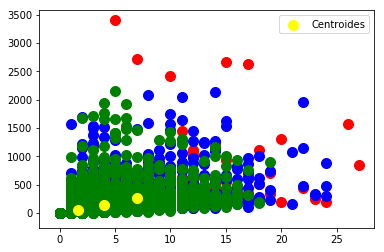

In [22]:
#Visualizamos los cluster
plt.scatter(data[idx == 0, 0], data[idx == 0, 1], s = 100, c = 'red', )
plt.scatter(data[idx == 1, 0], data[idx == 1, 1], s = 100, c = 'blue',)
plt.scatter(data[idx == 2, 0], data[idx == 2, 1], s = 100, c = 'green')



#Graficamos los centroides en amarillo
plt.scatter(centroids[:, 0], centroids[:,1], s = 100, c = 'yellow', label = 'Centroides')

plt.legend()

In [23]:
t1=time.time()

In [24]:
# K = 4 (4 clusters)
centroids,_ = kmeans2(data,4)

/Users/lauraruizmartinez/anaconda3/lib/python3.7/site-packages/scipy/cluster/vq.py:580: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


In [25]:
t2=time.time()
tiempo = float(t2-t1)

print('K-means utilizando scipy.kmeans() para k=4')
print("Tiempo de ejecucion: {} segundos".format(tiempo))

K-means utilizando scipy.kmeans() para k=4
Tiempo de ejecucion: 0.03170299530029297 segundos


In [26]:
idx,_ = vq(data,centroids)
idx,_

(array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 array([475.24614019, 411.79411588, 475.27036454, ..., 293.27210298,
        128.45160823, 454.08710977]))

In [27]:
centroids

array([[ 2.92239043e+00,  3.28544422e+02, -3.59804099e-01,
        -2.16707807e+01, -5.38289326e+01, -1.12874997e+03,
        -5.11236949e-02,  1.98551846e-02,  1.13093590e+01,
         2.01589965e-01,  4.71455719e+00,  2.02997334e+00,
        -2.07689069e-01,  1.24870399e+00,  2.40839474e+00,
         7.97422295e-01,  9.52657122e-01,  6.17519667e-03],
       [ 1.66048917e+00,  5.50479244e+01,  2.82512660e-01,
         1.66077116e+01,  1.62374744e+01,  4.71427025e+02,
         2.69584760e-02,  4.98277462e-02,  5.20433152e+00,
         6.45189096e-02,  7.40933089e+00,  2.11949143e+00,
         2.36784829e+00,  3.16086629e+00,  4.17088676e+00,
         8.42904859e-01,  2.32733542e-01,  1.27787954e-01],
       [ 3.95313086e+00,  1.45183057e+02,  1.00374953e+00,
         7.12987856e+01,  6.31192351e+01,  2.63227403e+03,
         7.87237756e-03,  2.28478944e-02,  8.40147537e+00,
         5.39182602e-02,  8.26584177e+00,  2.13910761e+00,
         2.32358455e+00,  3.15785527e+00,  3.77465317e

In [28]:
metrics.silhouette_score(data, idx, metric='euclidean')

0.665117248513336